In [1]:
import pandas as pd
Codes=pd.read_csv("ATUS_Survey/codes.csv")
Activities=pd.read_csv("ATUS_Survey/atusact.csv")
Summary=pd.read_csv("ATUS_Survey/atussum.csv")
#print(SU.head(10))
N_people=len(Summary["tucaseid"]) 

In [9]:
#(Activities["trcodep"]==10101) | (Activities["trcodep"]==10199)
N_sleeps=0
#for ind,row in Activities.iterrows():
#    if row["trcodep"]==10101 or row["trcodep"]==10199:
#        N_sleeps+=1
for code in Activities["trcodep"]:
    if code==10101 or code==10199:
        N_sleeps+=1
print(N_sleeps)

    

365548


In [8]:
N_acts=len(Activities["trcodep"])
print(N_acts)

3347093


In [60]:
import numpy as np
sleepinds=(Activities["trcodep"]==10101) | (Activities["trcodep"]==10199)
print(np.sum(sleepinds))

365548


In [16]:
print(Activities["tustarttim"].head())

0    04:00:00
1    05:00:00
2    05:30:00
3    15:30:00
4    18:00:00
Name: tustarttim, dtype: object


In [17]:
time1=Activities["tustarttim"][0]
print(time1)

04:00:00


In [21]:
import datetime
print(datetime.time(5,0,0)>datetime.time(time1))

TypeError: an integer is required (got type str)

In [25]:
def Hour(time):
    L=time.split(":")
    return int(L[0])
def Minute(time):
    L=time.split(":")
    return int(L[1])
def Hour_Decimal(time):
    L=time.split(":")
    return int(L[0])+int(L[1])/60 +int(L[2])/3600
Hour_Decimal(Activities["tustarttim"][2])

5.5

In [74]:

print(SleepCounts)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [135]:
times=np.arange(0,24+1/12,1/12)
SleepCounts=[0]*len(times)
Sample=len(Activities)
for ind,row in Activities[sleepinds].head(Sample).iterrows():
    S=Hour_Decimal(row["tustarttim"])
    E=Hour_Decimal(row["tustoptime"])
    if S<4 and E>4: #Make sure people don't have >24 hr logged
        E=3.99
    #index=(times>=S) & (times<=E)
    for ind,counts in enumerate(SleepCounts):
        if S<E and (times[ind]>=S and times[ind]<=E):
            SleepCounts[ind]+=1
        else:
            if S>E and (times[ind]>=S or (times[ind]<=E and times[ind]<4)):
                SleepCounts[ind]+=1
                
print(SleepCounts)
NSample=len(np.unique(Activities[sleepinds].head(Sample)["tucaseid"]))

[142790, 142968, 143903, 145137, 145868, 145980, 149624, 149337, 150333, 151123, 151183, 151756, 155674, 155257, 155328, 156386, 156709, 156740, 158498, 158035, 158523, 158926, 158901, 159214, 161569, 160073, 160782, 161195, 161151, 161485, 162546, 161832, 162253, 162508, 162407, 162612, 163937, 161938, 162503, 162811, 162668, 162867, 163493, 162263, 162562, 162756, 162490, 162561, 159214, 157418, 157352, 157578, 157558, 157478, 157929, 156103, 156083, 156186, 155609, 155525, 156145, 148353, 148335, 148401, 147594, 147420, 147744, 139456, 139440, 139465, 138194, 138023, 138560, 118288, 118267, 118356, 117187, 116938, 117170, 103591, 103555, 103572, 102265, 102106, 102413, 77665, 77662, 77785, 77145, 77017, 77248, 65478, 65467, 65552, 65016, 64971, 65281, 43676, 43815, 43890, 43562, 43599, 43798, 36671, 36785, 36848, 36594, 36674, 36923, 22948, 23062, 23127, 22982, 23045, 23229, 19717, 19781, 19822, 19712, 19775, 20038, 12150, 12285, 12361, 12317, 12403, 12578, 10896, 10982, 11053, 1096

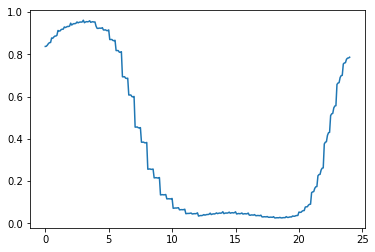

In [136]:
import matplotlib.pyplot as plt
NSleepCounts=[x/NSample for x in SleepCounts]
plt.plot(times,NSleepCounts)
plt.show()

In [137]:
WitchingHour=times[SleepCounts==np.max(SleepCounts)]
print(WitchingHour)
print(np.max(NSleepCounts))

[ 3.]
0.960847981151


In [130]:
NSample

170617

Over a sample of 170617 people, the time when the most people are asleep is 3:00 a.m. and 96% of people are asleep then.

People like to round their start and stop times, so even though the plot has 5 minute precision, because I included both start and stop time in my counts, 3:00 gets a significant bump compared to the next time: 3:05.  3:00 should still be the actual most slept time within 15-30 minutes, though.